In [1]:
%matplotlib inline 

#Array processing
import numpy as np

#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures + statistical figures not in MPL.
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import Image

from sklearn.datasets import fetch_mldata, load_boston                                                                       
from sklearn.utils import shuffle                                                                                            
from sklearn.neighbors import KNeighborsClassifier                                                                           
from sklearn import metrics                                                                                                  
from sklearn import tree                                                                                                     
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor                                                       
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB                                                       
from sklearn.svm import SVC, LinearSVC , SVR                                                                                 
from sklearn.linear_model import Perceptron, LogisticRegression, LinearRegression                                            
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor                                                    
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier                                                       
from sklearn.cross_validation import KFold, train_test_split, cross_val_score                                                
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from time import time

########You have to install the python package pydot for generating some graph figures
########   If you are using pip, the command is pip install pydot
########You will also need to download Graphviz from http://www.graphviz.org/Download.php
########If you are using Windows, make sure that Graphviz/dot are in path and can be used by pydot package.
########If you get any pydot error, see url for one possible solution
######## http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will
######## If you are using Anaconda, pydot can be installed as conda install pydot
######## If that does not work check url:
########   http://stackoverflow.com/questions/27482170/installing-pydot-and-graphviz-packages-in-anaconda-environment

import pydot, StringIO 


########################If needed you can import additional packages for helping you, although I would discourage it
########################Put all your imports in the space below. If you use some strange package, 
##########################provide clear information as to how we can install it.
from sklearn.preprocessing import label_binarize
#######################End imports###################################


#Part 1: Binary Classification of MNIST Dataset

In the first set of tasks, you will evaluate a number of popular classifiers for the task of recognizing handwritten digits from MNIST dataset. Specifically, we will focus on distinguishing between 7 and 9 which are known to be a hard pair. We will not use any sophisticated ideas from Computer Vision/Image Processing and use classifiers directly over the data.

#Images = 70000 and #Pixel per image = 784
First image shows 0
The corresponding matrix version of image is 
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   

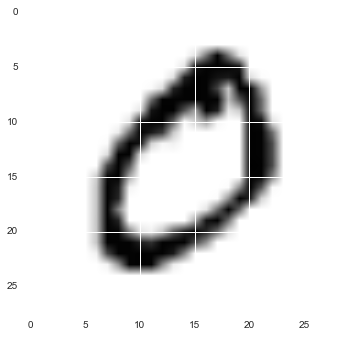

In [2]:
####################Do not change anything below
#Load MNIST data. fetch_mldata will download the dataset and put it in a folder called mldata. 
#Some things to be aware of:
#   The folder mldata will be created in the folder in which you started the notebook
#   So to make your life easy, always start IPython notebook from same folder.
#   Else the following code will keep downloading MNIST data
mnist = fetch_mldata("MNIST original")                      
#The data is organized as follows:
#  Each row corresponds to an image
#  Each image has 28*28 pixels which is then linearized to a vector of size 784 (ie. 28*28)
# mnist.data gives the image information while mnist.target gives the number in the image
print "#Images = %d and #Pixel per image = %s" % (mnist.data.shape[0], mnist.data.shape[1])

#Print first row of the dataset 
img = mnist.data[0]                                                                                                          
print "First image shows %d" % (mnist.target[0])
print "The corresponding matrix version of image is \n" , img
print "The image in grey shape is "
plt.imshow(img.reshape(28, 28), cmap="Greys")                                                                                
                                                                                                                             
#First 60K images are for training and last 10K are for testing
all_train_data = mnist.data[:60000]                                                                                          
all_test_data = mnist.data[60000:]                                                                                           
all_train_labels = mnist.target[:60000]                                                                                      
all_test_labels = mnist.target[60000:]                                                                                       
                                                              
                                                                                                                             
#For the first task, we will be doing binary classification and focus  on two pairs of 
#  numbers: 7 and 9 which are known to be hard to distinguish
#Get all the seven images
sevens_data = mnist.data[mnist.target==7]      
#Get all the none images
nines_data = mnist.data[mnist.target==9]       
#Merge them to create a new dataset
binary_class_data = np.vstack([sevens_data, nines_data])    
binary_class_labels = np.hstack([np.repeat(7, sevens_data.shape[0]), np.repeat(9, nines_data.shape[0])])    
 
#In order to make the experiments repeatable, we will seed the random number generator to a known value
# That way the results of the experiments will always be same
np.random.seed(1234)                        
#randomly shuffle the data
binary_class_data, binary_class_labels = shuffle(binary_class_data, binary_class_labels)  
print "Shape of data and labels are :" , binary_class_data.shape, binary_class_labels.shape   

#There are approximately 14K images of 7 and 9. 
#Let us take the first 5000 as training and remaining as test data                                          
orig_binary_class_training_data = binary_class_data[:5000]                                                  
binary_class_training_labels = binary_class_labels[:5000]                                                   
orig_binary_class_testing_data = binary_class_data[5000:]                                                   
binary_class_testing_labels = binary_class_labels[5000:] 

#The images are in grey scale where each number is between 0 to 255
# Now let us normalize them so that the values are between 0 and 1. 
# This will be the only modification we will make to the image
binary_class_training_data = orig_binary_class_training_data / 255.0                                        
binary_class_testing_data = orig_binary_class_testing_data / 255.0                                          
scaled_training_data = all_train_data / 255.0                                                                                
scaled_testing_data = all_test_data / 255.0  

print binary_class_training_data[0,:]                                                                       
     
###########Make sure that you remember the variable names and their meaning
#binary_class_training_data, binary_class_training_labels: Normalized images of 7 and 9 and the correct labels for training
#binary_class_testing_data, binary_class_testing_labels : Normalized images of 7 and 9 and correct labels for testing
#orig_binary_class_training_data, orig_binary_class_testing_data: Unnormalized images of 7 and 9
#all_train_data, all_test_data: un normalized images of all digits 
#all_train_labels, all_test_labels: labels for all digits
#scaled_training_data, scaled_testing_data: Normalized version of all_train_data, all_test_data for all digits


##Binary Classification in scikit-learn

All classifiers in scikit-learn follow a common pattern that makes life much easier. 
Follow these steps for all the tasks below.

1. Instantiate the classifier with appropriate parameters
2. Train/fit the classifier with training data and correct labels
3. Test the classifier with unseen data
4. Evaluate the performance of classifier

##K-Nearest Neighbor

We will start with one of the simplest classifiers. In the cell below, I have given the code for k-NN with k=1.
This should give an idea about how to create, train and evaluate a classifier.

In [6]:
# Do not change anything in this cell.
# The following are some utility functions to help you visualize k-NN


#Code courtesy AMPLab

#This function displays one or more images in a grid manner.
def show_img_with_neighbors(imgs, n=1):                       
  fig = plt.figure()                                          
  for i in xrange(0, n):                                      
      fig.add_subplot(1, n, i, xticklabels=[], yticklabels=[])
      if n == 1:                                              
          img = imgs                                          
      else:                                                   
          img = imgs[i]                                       
      plt.imshow(img.reshape(28, 28), cmap="Greys")           

#This function shows some images for which k-NN made a mistake
# For each of the missed image, it will also show k most similar images so that you will get an idea of why it failed. 
def show_erroring_images_for_model(errors_in_model, num_img_to_print, model, n_neighbors): 
  for errorImgIndex in errors_in_model[:num_img_to_print]:                             
      error_image = binary_class_testing_data[errorImgIndex]                           
      not_needed, result = model.kneighbors(error_image, n_neighbors=n_neighbors)      
      show_img_with_neighbors(error_image)                                             
      show_img_with_neighbors(binary_class_training_data[result[0],:], len(result[0])) 

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')
Accuracy of K-NN with k=1 is 0.984109825965


//anaconda/lib/python2.7/site-packages/matplotlib/axes/_subplots.py:69: MatplotlibDeprecationWarning: The use of 0 (which ends up being the _last_ sub-plot) is deprecated in 1.4 and will raise an error in 1.5
  mplDeprecation)


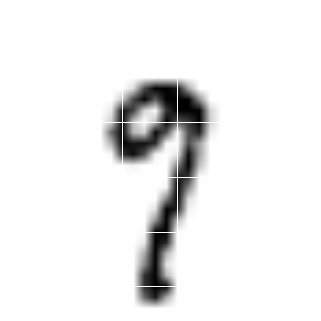

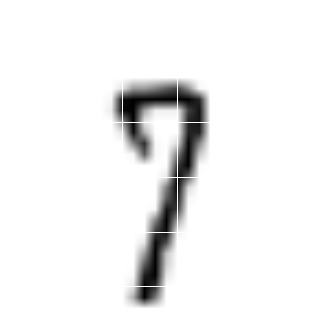

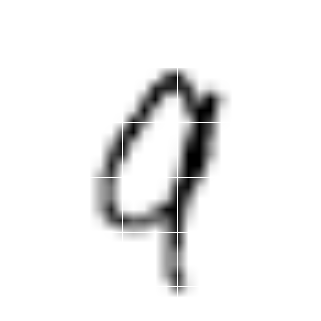

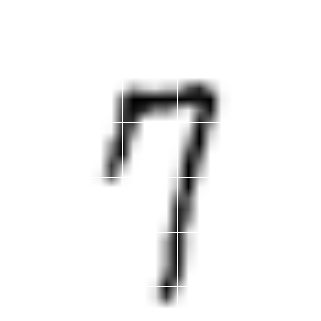

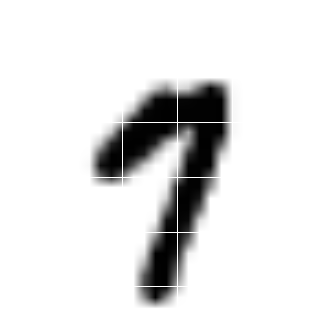

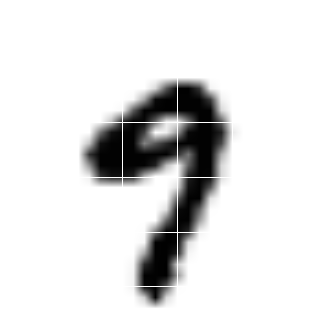

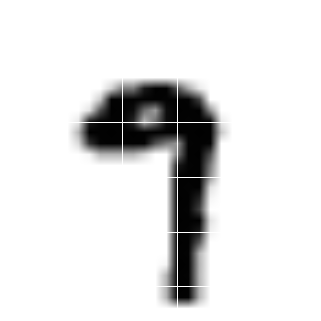

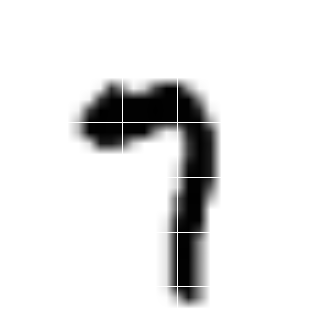

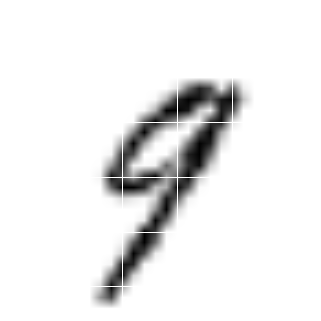

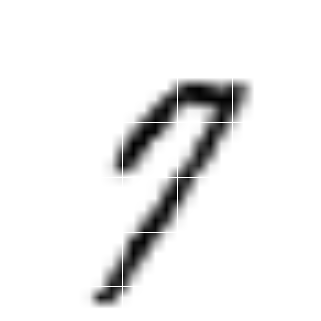

In [7]:
# Do not change anything in this cell.
#The code below creates a K-NN classifier with k=1.
#Clearly observe how I do it step by step.

#Step 1: Create a classifier with appropriate parameters
knn_model_k1 = KNeighborsClassifier(n_neighbors=1, algorithm='brute')
#Step 2: Fit it with training data
knn_model_k1.fit(binary_class_training_data, binary_class_training_labels)
#Print the model so that you know all parameters
print(knn_model_k1)                             
#Step 3: Make predictions based on testing data
predictions_knn_model_k1 = knn_model_k1.predict(binary_class_testing_data)
#Step 4: Evaluate the data
print "Accuracy of K-NN with k=1 is", metrics.accuracy_score(binary_class_testing_labels, predictions_knn_model_k1)  

#Let us now see the first five images that were predicted incorrectly see what the issue is                                  
errors_knn_model_k1 = [i for i in xrange(0, len(binary_class_testing_data)) if predictions_knn_model_k1[i] != binary_class_testing_labels[i]]
show_erroring_images_for_model(errors_knn_model_k1, 5, knn_model_k1, 1)                                                      


0.985515079451


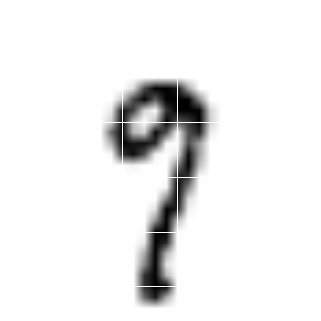

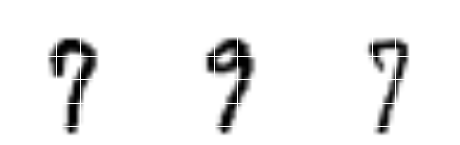

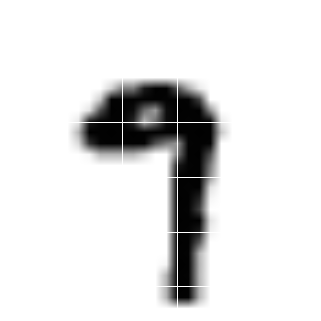

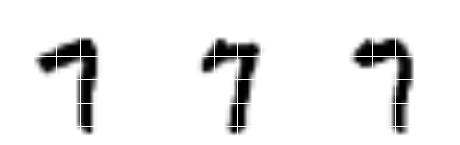

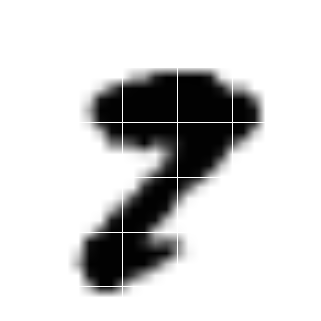

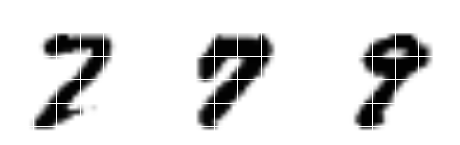

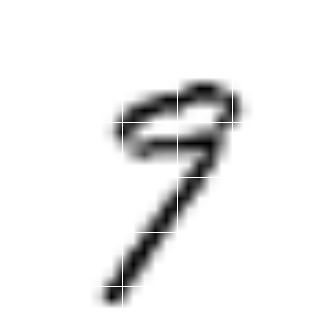

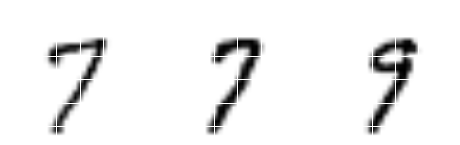

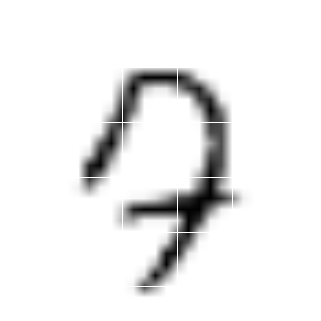

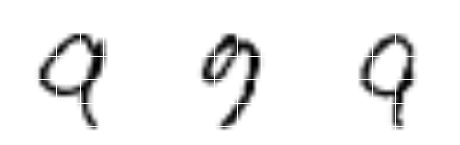

In [8]:
#task t1a
#Using the above code as model, create a KNN classifier with k=3
#Change the following line as appropriate
knn_model_k3 = KNeighborsClassifier(n_neighbors=3, algorithm='brute')
knn_model_k3.fit(binary_class_training_data, binary_class_training_labels)
#Change the following line as appropriate
predictions_knn_model_k3 = knn_model_k3.predict(binary_class_testing_data)                                                                                                
print metrics.accuracy_score(binary_class_testing_labels, predictions_knn_model_k3)

#Let us now see the first five images that were predicted incorrectly see what the issue is                                  
errors_knn_model_k3 = [i for i in xrange(0, len(binary_class_testing_data)) if predictions_knn_model_k3[i] != binary_class_testing_labels[i]]
show_erroring_images_for_model(errors_knn_model_k3, 5, knn_model_k3, 3)                                                      


0.984434115231


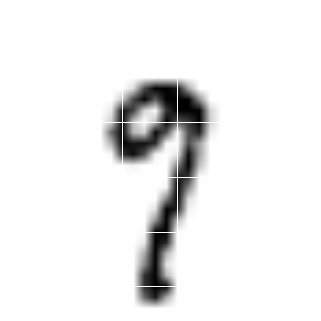

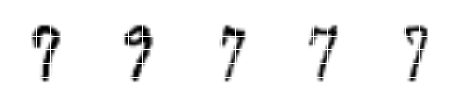

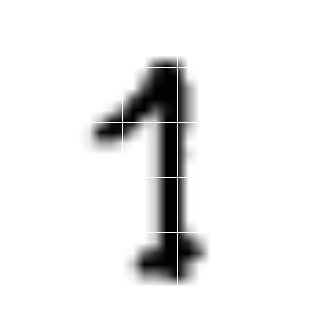

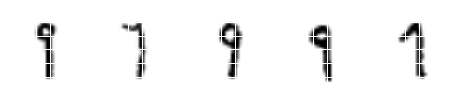

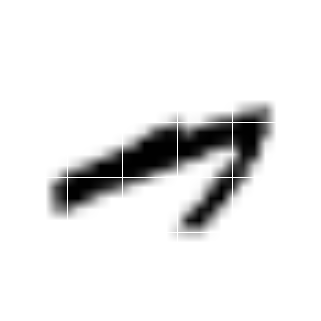

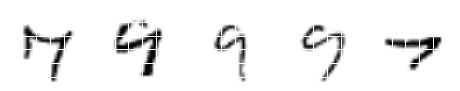

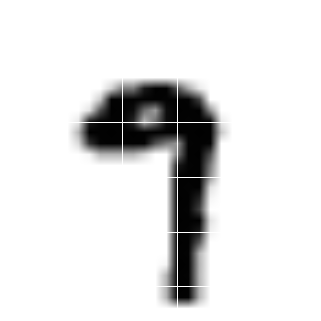

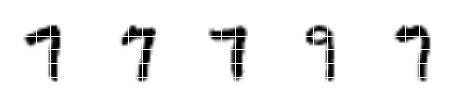

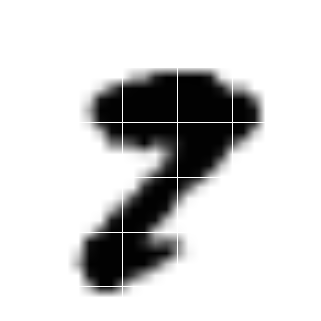

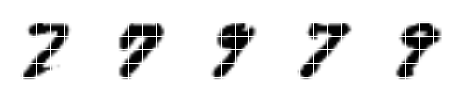

In [9]:
#task t1b
#Using the above code as model, create a KNN classifier with k=5
#Change the following line as appropriate
knn_model_k5 = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn_model_k5.fit(binary_class_training_data, binary_class_training_labels)
#Change the following line as appropriate
predictions_knn_model_k5 = knn_model_k5.predict(binary_class_testing_data)                                                 
print metrics.accuracy_score(binary_class_testing_labels, predictions_knn_model_k5)

#Let us now see the first five images that were predicted incorrectly see what the issue is                                  
errors_knn_model_k5 = [i for i in xrange(0, len(binary_class_testing_data)) if predictions_knn_model_k5[i] != binary_class_testing_labels[i]]
show_erroring_images_for_model(errors_knn_model_k5, 5, knn_model_k5, 5)                                                      


In [10]:
#task t1c
#Now let us evaluate KNN for different values of K and find the best K
#WARNING: This code will take 20-40 minutes to run. So make sure your code is correct
k_vals = xrange(1, 5)
#Initialize to 0
accuracy_vals = [0 for _ in k_vals] 
for k in k_vals:
    #Create a KNN with number of neighbors = k  - #Change the following line as appropriate
    knn_model_for_knn_k = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
    knn_model_for_knn_k.fit(binary_class_training_data, binary_class_training_labels)
    #Make the prediction - #Change the following line as appropriate
    predictions_for_knn_k = knn_model_for_knn_k.predict(binary_class_testing_data)
    accuracy_vals[k-1] = metrics.accuracy_score(binary_class_testing_labels, predictions_for_knn_k)
    
#Now you have two arrays k_vals which have different values of k and accuracy_vals which have the corresponding accuracy 
# of a model with that k
#Set opt_k to k that gives best accuracy. 
# Hint: use np.argmax command.
# Also dont forget to add 1 to opt_k to correct the off by one error 
#     (as k varied from 1 to 20 while accuracy_vals[k] started from 0)
knn_max = np.argmax(accuracy_vals)
opt_k = knn_max+1 ##Change the following line as appropriate

In [11]:
#task t1d
#Train the model with optimal k that we have seen so far
#Change the following line as appropriate
knn_model_opt_k = KNeighborsClassifier(n_neighbors=opt_k, algorithm='brute')
knn_model_opt_k.fit(binary_class_training_data, binary_class_training_labels)
predictions_for_knn_opt_k = knn_model_opt_k.predict(binary_class_testing_data)
print "Accuracy for best k is ", metrics.accuracy_score(binary_class_testing_labels, predictions_for_knn_opt_k)

Accuracy for best k is  0.985515079451


In [12]:
#(Harder)task t1e
##############################Read the parameter values in the url
# http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
#Try different combinations of the parameters so that you can beat the accuracy of knn_model_opt_k
#Change the following line as appropriate
knn_model_opt_k_student = KNeighborsClassifier(n_neighbors=opt_k, weights = 'distance', algorithm='auto',  p=6, metric='minkowski')
knn_model_opt_k_student.fit(binary_class_training_data, binary_class_training_labels)
predictions_for_knn_opt_k_student = knn_model_opt_k_student.predict(binary_class_testing_data)
print "Accuracy for best k - variant by student is ", metrics.accuracy_score(binary_class_testing_labels, predictions_for_knn_opt_k_student)

Accuracy for best k - variant by student is  0.985947465139


##Decision Trees

In the next set of tasks, you will use Decision trees (see url
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
) for classification. 

In [14]:
###Do not make any change below
def plot_dtree(model,fileName):                                                                                              
    #You would have to install a Python package pydot                                                                        
    #You would also have to install graphviz for your system - see http://www.graphviz.org/Download..php                     
    #If you get any pydot error, see url
    # http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will
    dot_tree_data = StringIO.StringIO()                                                                                      
    tree.export_graphviz(model , out_file = dot_tree_data)                                                                   
    dtree_graph = pydot.graph_from_dot_data(dot_tree_data.getvalue())                                                        
    dtree_graph.write_png(fileName)                   

In [11]:
#task t2a
#Create a CART decision tree with DEFAULT values
#Remember to set the random state to 1234
#Change the following line as appropriate
cart_model_default = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=1234, min_density=None, compute_importances=None, max_leaf_nodes=None) 
cart_model_default.fit(binary_class_training_data, binary_class_training_labels)
print(cart_model_default) 
fileName = 'dtree_default.png'
plot_dtree(cart_model_default, fileName)
Image(filename=fileName)
#Change the following line as appropriate
predictions_dtree_default = cart_model_default.predict(binary_class_testing_data) 
print metrics.accuracy_score(binary_class_testing_labels,predictions_dtree_default) 

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1234, splitter='best')
0.967138687709


In [12]:
#task t2b
#Create a CART decision tree with splitting criterion as entropy
#Remember to set the random state to 1234
#Change the following line as appropriate
cart_model_entropy = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=1234, min_density=None, compute_importances=None, max_leaf_nodes=None) 
cart_model_entropy.fit(binary_class_training_data, binary_class_training_labels)
print(cart_model_entropy) 
fileName = 'dtree_entropy.png'
plot_dtree(cart_model_entropy, fileName)
Image(filename=fileName)
#Change the following line as appropriate
predictions_dtree_entropy = cart_model_entropy.predict(binary_class_testing_data)  
print metrics.accuracy_score(binary_class_testing_labels,predictions_dtree_entropy) 

DecisionTreeClassifier(compute_importances=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1234, splitter='best')
0.969408712572


In [13]:
#task t2c
#Create a CART decision tree with splitting criterion as entropy and min_samples_leaf as 100
#Remember to set the random state to 1234
#Change the following line as appropriate
cart_model_entropy_limit_leaves = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=100, max_features=None, random_state=1234, min_density=None, compute_importances=None, max_leaf_nodes=None) 
cart_model_entropy_limit_leaves.fit(binary_class_training_data, binary_class_training_labels)
print(cart_model_entropy_limit_leaves) 
fileName = 'dtree_entropy_limit_leaves.png'
plot_dtree(cart_model_entropy_limit_leaves, fileName)
Image(filename=fileName)
#Change the following line as appropriate
predictions_dtree_entropy_limit_leaves = cart_model_entropy_limit_leaves.predict(binary_class_testing_data) 
print metrics.accuracy_score(binary_class_testing_labels,predictions_dtree_entropy_limit_leaves) 

DecisionTreeClassifier(compute_importances=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=100, min_samples_split=2,
            random_state=1234, splitter='best')
0.926926818722


In [17]:
#(Harder) task t2d
#Create a CART decision tree that beats the three models above
# You might want to consult the url
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
#Change the following line as appropriate
cart_model_student = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=25, min_samples_leaf=9, max_features=None, random_state=1234, min_density=None, compute_importances=None, max_leaf_nodes=None)  #Create the model with parameters that beats the models above
cart_model_student.fit(binary_class_training_data, binary_class_training_labels)
print(cart_model_student)
fileName = 'dtree_model_student.png'
plot_dtree(cart_model_student, fileName)
Image(filename=fileName)
#Change the following line as appropriate
predictions_dtree_student = cart_model_student.predict(binary_class_testing_data) #change this line to make predictions
print metrics.accuracy_score(binary_class_testing_labels, predictions_dtree_student) 

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=9, min_samples_split=25,
            random_state=1234, splitter='best')
0.971894930278


##Naive Bayes

In this task, you will create a set of Naive Bayes classifiers and evaluate them. You might want to use the following url
http://scikit-learn.org/stable/modules/naive_bayes.html 

In [15]:
#task t3a
#Create a Gaussian NB
#Change the following line as appropriate
nb_gaussian_model = GaussianNB() #create the model
nb_gaussian_model.fit(binary_class_training_data, binary_class_training_labels)
print(nb_gaussian_model) 
#Change the following line as appropriate
predictions_gaussian_nb = nb_gaussian_model.predict(binary_class_testing_data) #make the predictions
print metrics.accuracy_score(binary_class_testing_labels,predictions_gaussian_nb) 

GaussianNB()
0.658955788563


In [16]:
#task t3b
#Now create multinomial NB
#Change the following line as appropriate
nb_multinomial_model = MultinomialNB() #create the model
nb_multinomial_model.fit(binary_class_training_data, binary_class_training_labels)
print(nb_multinomial_model) 
#Change the following line as appropriate
predictions_multinomial_nb = nb_multinomial_model.predict(binary_class_testing_data) #make the predictions
print metrics.accuracy_score(binary_class_testing_labels,predictions_multinomial_nb)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.915900983677


In [17]:
#task t3c
#Now create a binomial NB
#Change the following line as appropriate
nb_binomial_model = BernoulliNB() #create the model
nb_binomial_model.fit(binary_class_training_data, binary_class_training_labels)
print(nb_binomial_model) 
#Change the following line as appropriate
predictions_binomial_nb = nb_binomial_model.predict(binary_class_testing_data) #make the predictions
print metrics.accuracy_score(binary_class_testing_labels,predictions_binomial_nb)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.920981515512


##SVM

Let us test SVM on this dataset. You might want to read the http://scikit-learn.org/stable/modules/svm.html for help.
We will focus on SVC and LinearSVC.

In [18]:
#task t4a
#Create a SVM using SVC class. Remember to set random state to 1234.
#Change the following line as appropriate
svc_svm_model = SVC(random_state=1234)
svc_svm_model.fit(binary_class_training_data, binary_class_training_labels)                         
print(svc_svm_model)                    
#Change the following line as appropriate
predictions_svm_svc =svc_svm_model.predict(binary_class_testing_data)                                                     
print metrics.accuracy_score(binary_class_testing_labels,predictions_svm_svc)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)
0.953950924224


In [19]:
#task t4b
#Now create a linear SVM model using LinearSVC class. Remember to set random state to 1234.
#Change the following line as appropriate
linear_svc_svm_model = LinearSVC(random_state=1234) 
linear_svc_svm_model.fit(binary_class_training_data, binary_class_training_labels)            
print(linear_svc_svm_model)       
#Change the following line as appropriate
predictions_linear_svm_svc = linear_svc_svm_model.predict(binary_class_testing_data)                                        
print metrics.accuracy_score(binary_class_testing_labels,predictions_linear_svm_svc)  

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=1234, tol=0.0001, verbose=0)
0.9494108745


In [3]:
#(Harder) task t4c
#####Either using SVC or LinearSVC, try tweaking the parameters so that you beat the two models above
#Change the following line as appropriate
svc_svm_model_student = SVC(C=4.0, cache_size=100, class_weight=None, coef0=0.0, degree=4, gamma=0.1, kernel='poly', max_iter=-1, probability=True, random_state=1234,shrinking=True, tol=0.001, verbose=False) 
svc_svm_model_student.fit(binary_class_training_data, binary_class_training_labels)                         
print(svc_svm_model_student)   
#Change the following line as appropriate
predictions_svm_svc_student = svc_svm_model_student.predict(binary_class_testing_data) 
print metrics.accuracy_score(binary_class_testing_labels,predictions_svm_svc_student) 

SVC(C=4.0, cache_size=100, class_weight=None, coef0=0.0, degree=4, gamma=0.1,
  kernel='poly', max_iter=-1, probability=True, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)
0.986163657983


##Logistic Regression

Logistic regression is a simple classifier that converts a regression model into a classification one.
You can read the details at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html 


In [21]:
#task t5a
#Create a model with default parameters. Remember to set random state to 1234
#Change the following line as appropriate
lr_model_default = LogisticRegression(random_state=1234)            
lr_model_default.fit(binary_class_training_data, binary_class_training_labels)
#Change the following line as appropriate
predictions_lr_model_default = lr_model_default.predict(binary_class_testing_data)
print metrics.accuracy_score(binary_class_testing_labels,predictions_lr_model_default)

0.957301913307


In [22]:
#(Harder) task t5b
#Now try to beat the model above by tweaking the parameters. Remember to set random state to 1234.
#Change the following line as appropriate
lr_model_default_student = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=12, class_weight=None, random_state=1234)            
lr_model_default_student.fit(binary_class_training_data, binary_class_training_labels)
#Change the following line as appropriate
predictions_lr_model_default_student = lr_model_default_student.predict(binary_class_testing_data)
print metrics.accuracy_score(binary_class_testing_labels,predictions_lr_model_default_student)

0.957626202573


##Perceptron

Perceptron is a simple model that can be used for linearly separable data. See details at url
http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html .


In [23]:
#task t6a
#Create a perceptron model with default parameters and random state = 1234
#Change the following line as appropriate
perceptron_model_default = Perceptron(random_state=1234)
perceptron_model_default.fit(binary_class_training_data, binary_class_training_labels)       
print(perceptron_model_default)                 
#Change the following line as appropriate
predictions_perceptron_default = perceptron_model_default.predict(binary_class_testing_data)
print metrics.accuracy_score(binary_class_testing_labels,predictions_perceptron_default)    

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=1234, shuffle=False,
      verbose=0, warm_start=False)
0.933520700465


##Random Forests

Random Forests is a very popular ensemble method. See url 
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
for details

In [24]:
#task t7a
#Create a random forest classifier with Default parameters
#Change the following line as appropriate
rf_model_default = RandomForestClassifier(random_state=1234)                                                                   
rf_model_default.fit(binary_class_training_data, binary_class_training_labels)                                                                    
print(rf_model_default)            
#Change the following line as appropriate
predictions_rf_default = rf_model_default.predict(binary_class_testing_data)
print metrics.accuracy_score(binary_class_testing_labels,predictions_rf_default) 

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0)
0.973948762296


In [25]:
#(Harder) task t7b
#Create a random forest classifier that can beat the above default model.
#Change the following line as appropriate
rf_model_default_student = RandomForestClassifier(n_estimators=30, criterion='entropy', random_state=1234)                                                                                                                                      
rf_model_default_student.fit(binary_class_training_data, binary_class_training_labels)                                                                    
print(rf_model_default_student)        
#Change the following line as appropriate
predictions_rf_default_student = rf_model_default_student.predict(binary_class_testing_data)
print metrics.accuracy_score(binary_class_testing_labels,predictions_rf_default_student) 

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0)
0.978921197708


#Part 2: Multi Class Classification

So far, we have been focussing on binary classification problems.
Now let us consider the corresponding multi class classification problem 
where given an image, we have to predict whether it is any of the digits 0 to 9. 

We will evaluate 4 classifiers - KNN, Decision Trees, Random Forest and SVM.
We can see that for the first three, no changes are needed to make them multi class. 
SVM however, is by default, a  binary classifier.
We can use two options : OneVsRestClassifier or OneVsOneClassifier to make it into Multi Class classifier. 
See http://scikit-learn.org/stable/modules/multiclass.html for further details.

Make sure that you remember the variable names and their meaning:

1. all_train_data, all_test_data: un normalized images of all digits 
2. all_train_labels, all_test_labels: labels for all digits
3. scaled_training_data, scaled_testing_data: Normalized version of all_train_data, all_test_data for all digits

In [26]:
#task t8a
#Create a KNN Classifier for K=5 and train it on **scaled** training data and test it on scaled testing data
#Change the following line as appropriate
mc_knn_model_k = KNeighborsClassifier(n_neighbors=5,algorithm='brute') 
mc_knn_model_k.fit(scaled_training_data, all_train_labels)
#Change the following line as appropriate
predictions_mc_knn_model = mc_knn_model_k.predict(scaled_testing_data) 
print metrics.accuracy_score(all_test_labels, predictions_mc_knn_model)

0.9688


In [27]:
#task t8b
#Create a Decision tree with DEFAULT parameters and train it on **scaled** training data and test it on scaled testing data
#Remember to set random state to 1234
#Change the following line as appropriate
mc_cart_model_default = DecisionTreeClassifier(random_state=1234) 
mc_cart_model_default.fit(scaled_training_data, all_train_labels)
print(mc_cart_model_default)
fileName = 'mc_dtree_default.png' 
plot_dtree(mc_cart_model_default, fileName) 
Image(filename=fileName)
#Change the following line as appropriate
predictions_mc_dtree_default = mc_cart_model_default.predict(scaled_testing_data) 
print metrics.accuracy_score(all_test_labels, predictions_mc_dtree_default)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=1, min_samples_split=2,
            random_state=1234, splitter='best')
0.8787


In [28]:
#(Harder) task t8c
#Using the multi classs decision tree above make some changes so that you can beat it.
# Remember to set random state to 1234
#Change the following line as appropriate
mc_cart_model_student = DecisionTreeClassifier(min_samples_split=23, min_samples_leaf=9, random_state=1234) 
mc_cart_model_student.fit(scaled_training_data, all_train_labels)
print(mc_cart_model_student)
fileName = 'mc_dtree_student.png' 
plot_dtree(mc_cart_model_student, fileName) 
Image(filename=fileName)
#Change the following line as appropriate
predictions_mc_dtree_student = mc_cart_model_student.predict(scaled_testing_data) 
print metrics.accuracy_score(all_test_labels, predictions_mc_dtree_student)

DecisionTreeClassifier(compute_importances=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_density=None, min_samples_leaf=9, min_samples_split=23,
            random_state=1234, splitter='best')
0.8793


In [29]:
#task t8d
#Create a multi class classifier based on random forest with default parameters.
#Change the following line as appropriate
mc_rf_model_default = RandomForestClassifier(random_state=1234)                                                                      
mc_rf_model_default.fit(all_train_data, all_train_labels)
print(mc_rf_model_default)      
#Change the following line as appropriate
predictions_mc_rf_default = mc_rf_model_default.predict(all_test_data)
print metrics.accuracy_score(all_test_labels,predictions_mc_rf_default)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0)
0.9487


In [30]:
#(Harder) task t8e
#Tune the random forest classifier so that it beats the default model above
#Change the following line as appropriate
mc_rf_model_student = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=1234)                                                                                                                                         
mc_rf_model_student.fit(all_train_data, all_train_labels)
print(mc_rf_model_student)                               
#Change the following line as appropriate
predictions_mc_rf_student = mc_rf_model_student.predict(all_test_data) 
print metrics.accuracy_score(all_test_labels,predictions_mc_rf_student)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0)
0.96


In [31]:
#task t8f
#Create a SVM based OneVsRestClassifier Set random state to 1234
#Change the following line as appropriate
mc_ovr_linear_svc_svm_model = OneVsRestClassifier(LinearSVC(random_state=1234)) 
mc_ovr_linear_svc_svm_model.fit(scaled_training_data, all_train_labels)
print(mc_ovr_linear_svc_svm_model)   
#Change the following line as appropriate
predictions_mc_ovr_linear_svm_svc = mc_ovr_linear_svc_svm_model.predict(scaled_testing_data)
print metrics.accuracy_score(all_test_labels,predictions_mc_ovr_linear_svm_svc) 

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=1234, tol=0.0001, verbose=0),
          n_jobs=1)
0.9182


In [32]:
#(Harder) task t8g
#Tune the model above so that it beats the default classifier.  Set random state to 1234
#Change the following line as appropriate
mc_ovr_linear_svc_svm_model_student = OneVsRestClassifier(LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, loss='l2', multi_class='crammer_singer', penalty='l1',random_state=1234, tol=0.0001, verbose=0))  
mc_ovr_linear_svc_svm_model_student.fit(scaled_training_data, all_train_labels)
print(mc_ovr_linear_svc_svm_model_student)   
#Change the following line as appropriate
predictions_mc_ovr_linear_svm_svc_student = mc_ovr_linear_svc_svm_model_student.predict(scaled_testing_data) 
print metrics.accuracy_score(all_test_labels,predictions_mc_ovr_linear_svm_svc_student) 

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='crammer_singer',
     penalty='l1', random_state=1234, tol=0.0001, verbose=0),
          n_jobs=1)
0.9219


In [33]:
#task t8h
#Create a SVM based OneVsOneClassifier. Set random state to 1234
#Change the following line as appropriate
mc_ovo_linear_svc_svm_model = OneVsOneClassifier(LinearSVC(random_state=1234)) 
mc_ovo_linear_svc_svm_model.fit(scaled_training_data, all_train_labels)
print(mc_ovo_linear_svc_svm_model)   
#Change the following line as appropriate
predictions_mc_ovo_linear_svm_svc = mc_ovo_linear_svc_svm_model.predict(scaled_testing_data)
print metrics.accuracy_score(all_test_labels,predictions_mc_ovo_linear_svm_svc)   

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='ovr', penalty='l2',
     random_state=1234, tol=0.0001, verbose=0),
          n_jobs=1)
0.9368


In [35]:
#(Harder) task t8i
#Tune the model so that it beats the classifier above. Set random state to 1234
#Change the following line as appropriate
mc_ovo_linear_svc_svm_model_student = OneVsOneClassifier(LinearSVC(class_weight=None, multi_class='crammer_singer',random_state=1234))  
mc_ovo_linear_svc_svm_model_student.fit(scaled_training_data, all_train_labels)
print(mc_ovo_linear_svc_svm_model_student)   
#Change the following line as appropriate
predictions_mc_ovo_linear_svm_svc_student = mc_ovo_linear_svc_svm_model_student.predict(scaled_testing_data)
print metrics.accuracy_score(all_test_labels,predictions_mc_ovo_linear_svm_svc_student)   

OneVsOneClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='l2', multi_class='crammer_singer',
     penalty='l2', random_state=1234, tol=0.0001, verbose=0),
          n_jobs=1)
0.9369


#Part 3: Exploration of Different Evaluation Metrics for Multi Class Classification

Let us evaluate different metrics for the multi class classification models that we created so far. 
You may want to check the url http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics for additional details.

In [36]:
#task t9a
#assign the best multi class classification model that you found above.
# For eg, depending on which decision tree model is best 
#  set best_dtree_model to either mc_cart_model_default or mc_cart_model_student
# Similarly do for other models as well. 
# Remember to assign the MODEL variable

#Change the following lines as appropriate
best_knn_model_mc = mc_knn_model_k 
best_dtree_model_mc = mc_cart_model_student 
best_rf_model_mc = mc_rf_model_student    
best_svm_ovr_model_mc = mc_ovr_linear_svc_svm_model_student 
best_svm_ovo_model_mc = mc_ovo_linear_svc_svm_model_student

#Assign the best BINARY classification models that you found above
best_knn_model_bc = knn_model_opt_k_student
best_dtree_model_bc = cart_model_student
best_rf_model_bc = rf_model_default_student
best_svm_model_bc = svc_svm_model_student


######Note - for tasks 9c and 9d you will use multi class models (ie. those variables ending in _mc)
############# For the remaining you will use binary class models (ie. those variables ending in _bc)

In [40]:
#task t9b
#Create predictions of these 5 models on test dataset
#Change the following lines as appropriate
predictions_best_knn_model_mc = best_knn_model_mc.predict(scaled_testing_data)
predictions_best_dtree_model_mc = best_dtree_model_mc.predict(scaled_testing_data)
predictions_best_rf_model_mc = best_rf_model_mc.predict(all_test_data)
predictions_best_svm_ovr_model_mc = best_svm_ovr_model_mc.predict(scaled_testing_data)
predictions_best_svm_ovo_model_mc = best_svm_ovo_model_mc.predict(scaled_testing_data)

#Create predictions of these 4 models on test dataset
#Change the following lines as appropriate
knn = [a[1] for a in best_knn_model_bc.predict_proba(binary_class_testing_data)]
predictions_best_knn_model_bc = knn
dtree = [b[1] for b in best_dtree_model_bc.predict_proba(binary_class_testing_data)]
predictions_best_dtree_model_bc = dtree
rf = [c[1] for c in best_rf_model_bc.predict_proba(binary_class_testing_data)]
predictions_best_rf_model_bc = rf
svm = [d[1] for d in best_svm_model_bc.predict_proba(binary_class_testing_data)]
predictions_best_svm_model_bc = svm

In [42]:
#task t9c
#Print the classification report for each of the models above
#Write code here
print 'Classification Report \n'
t9c_a=metrics.classification_report(all_test_labels,predictions_best_knn_model_mc)
print t9c_a
t9c_b=metrics.classification_report(all_test_labels,predictions_best_dtree_model_mc)
print t9c_b
t9c_c=metrics.classification_report(all_test_labels,predictions_best_rf_model_mc)
print t9c_c
t9c_d=metrics.classification_report(all_test_labels,predictions_best_svm_ovr_model_mc)
print t9c_d
t9c_e=metrics.classification_report(all_test_labels,predictions_best_svm_ovo_model_mc)
print t9c_e

Classification Report 

             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       980
        1.0       0.95      1.00      0.98      1135
        2.0       0.98      0.96      0.97      1032
        3.0       0.96      0.97      0.97      1010
        4.0       0.98      0.96      0.97       982
        5.0       0.97      0.97      0.97       892
        6.0       0.98      0.99      0.98       958
        7.0       0.96      0.96      0.96      1028
        8.0       0.99      0.94      0.96       974
        9.0       0.96      0.95      0.95      1009

avg / total       0.97      0.97      0.97     10000

             precision    recall  f1-score   support

        0.0       0.91      0.94      0.92       980
        1.0       0.95      0.96      0.96      1135
        2.0       0.86      0.85      0.86      1032
        3.0       0.83      0.87      0.85      1010
        4.0       0.87      0.88      0.87       982
        5.0       

In [43]:
#task t9d
#Print the confusion matrix for each of the models above
#  Write code here
print 'Confusion Matrix \n'
t9d_a = metrics.confusion_matrix(all_test_labels,predictions_best_knn_model_mc)
print 'KNN \n', t9d_a
t9d_b = metrics.confusion_matrix(all_test_labels,predictions_best_dtree_model_mc)
print 'Dtree \n', t9d_b
t9d_c = metrics.confusion_matrix(all_test_labels,predictions_best_rf_model_mc)
print 'Random Forest \n', t9d_c
t9d_d = metrics.confusion_matrix(all_test_labels,predictions_best_svm_ovr_model_mc)
print 'SVM OvR \n', t9d_d
t9d_e = metrics.confusion_matrix(all_test_labels,predictions_best_svm_ovo_model_mc)
print 'SVM OvO \n', t9d_e

Confusion Matrix 

KNN 
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]
Dtree 
[[ 920    0   12    6    4    7   12    4    9    6]
 [   0 1094    8    9    4    4    6    0   10    0]
 [  18   12  880   26   17   14   13   23   22    7]
 [   6    5   27  875    7   43    3   13   21   10]
 [   7    5   10    6  861   14   14   10   23   32]
 [  14    9   10   43    8  743   14    8   23   20]
 [  16    6   13    8   19   23  848    4   14    7]
 [   2   14   25   16   11    5    1  923    7   24]
 [  15    6   

In [45]:
#(Harder) task t9e
#Each of the model above has some probabilistic interpretation
# So sklearn allows you to get the probability values as part of classification
# Using this information, you can print roc_curve
#Print the roc curve for each of the models above
#  Write code here
print 'ROC Curve \n'
t9e=label_binarize(binary_class_testing_labels,classes=[7,9])

false_positive1, true_positive1, threshold1 = metrics.roc_curve(t9e,predictions_best_knn_model_bc)
print 'k Nearest Neighbors \n','\n False Positive', false_positive1
print '\n True Positive', true_positive1
print '\n Thresholds', threshold1

false_positive2, true_positive2, threshold2 = metrics.roc_curve(t9e,predictions_best_dtree_model_bc)
print 'Decision Tree \n', '\n False Positive', false_positive2
print '\n True Positive', true_positive2
print '\n Thresholds'
print threshold2

false_positive3, true_positive3, threshold3 = metrics.roc_curve(t9e,predictions_best_rf_model_bc)
print 'Random Forest \n', '\n False Positive', false_positive3
print '\n True Positive', true_positive3
print '\n Thresholds', threshold3


false_positive4, true_positive4, threshold4 = metrics.roc_curve(t9e,predictions_best_svm_model_bc)
print 'Support Vector Machine \n', '\n False Positive', false_positive4
print '\n True Positive', true_positive4
print '\n Thresholds', threshold4

ROC Curve 

k Nearest Neighbors 

 False Positive [ 0.          0.00379267  0.00379267  0.00379267  0.00379267  0.00379267
  0.00379267  0.00379267  0.00379267  0.00379267  0.00379267  0.00379267
  0.00379267  0.00379267  0.00379267  0.00379267  0.00379267  0.00379267
  0.00379267  0.00379267  0.00379267  0.00379267  0.00379267  0.00379267
  0.00379267  0.00379267  0.00379267  0.00379267  0.00400337  0.00400337
  0.00400337  0.00400337  0.00400337  0.00400337  0.00400337  0.00400337
  0.00400337  0.00400337  0.00400337  0.00400337  0.00400337  0.00400337
  0.00400337  0.00400337  0.00400337  0.00400337  0.00421408  0.00421408
  0.00421408  0.00421408  0.00421408  0.00442478  0.00442478  0.00442478
  0.00463548  0.00484619  0.00484619  0.00484619  0.00484619  0.00484619
  0.00484619  0.00505689  0.00505689  0.00505689  0.00505689  0.00505689
  0.00526759  0.00526759  0.0054783   0.0054783   0.0054783   0.0054783
  0.0054783   0.0054783   0.005689    0.005689    0.005689    0.005689
  0.

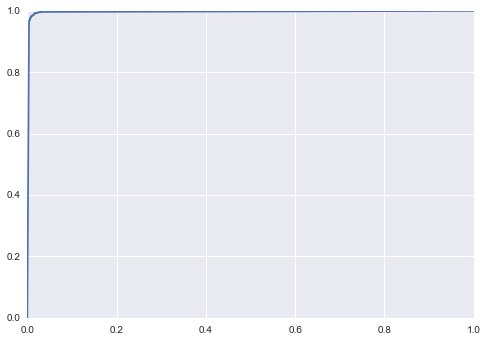

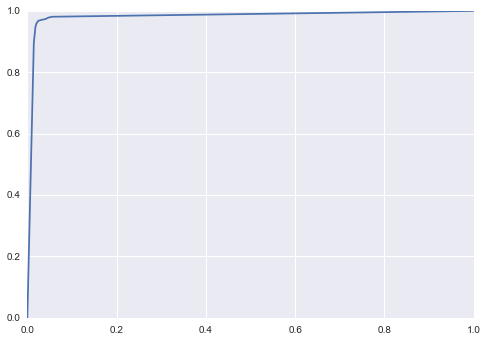

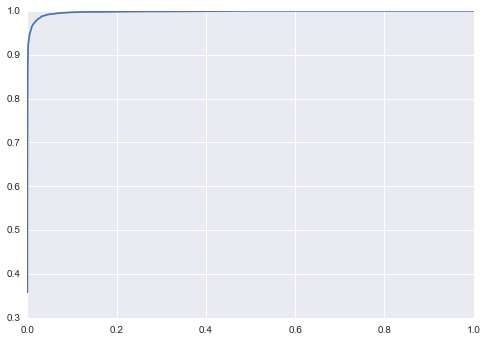

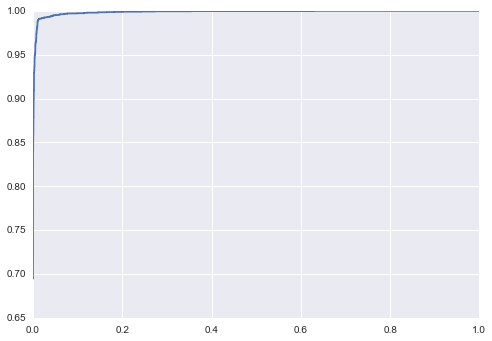

In [48]:
#(Harder) task t9f
#For each model, DRAW the ROC curve
# See url below for details
#http://nbviewer.ipython.org/github/datadave/GADS9-NYC-Spring2014-Lectures/blob/master/lessons/lesson09_decision_trees_random_forests/sklearn_decision_trees.ipynb
#  Write code here

plt.plot(false_positive1,true_positive1)
plt.show()

plt.plot(false_positive2,true_positive2)
plt.show()

plt.plot(false_positive3,true_positive3)
plt.show()

plt.plot(false_positive4,true_positive4)
plt.show()

In [49]:
#(Harder) task t9g
#Print the AUC value for each of the models above
#  Write code here

t9g=label_binarize(binary_class_testing_labels,classes=[7,9])

area1=metrics.roc_auc_score(t9g,predictions_best_knn_model_bc)
print '\n AUC Value \n','\n k Nearest Neighbors \n',area1

area2=metrics.roc_auc_score(t9g,predictions_best_dtree_model_bc)
print '\n Decision Tree \n', area2

area3=metrics.roc_auc_score(t9g,predictions_best_rf_model_bc)
print '\n Random Forest \n', area3

area4=metrics.roc_auc_score(t9g,predictions_best_svm_model_bc)
print '\n Support Vector Machine \n', area4


 AUC Value 

 k Nearest Neighbors 
0.996075484794

 Decision Tree 
0.981648849221

 Random Forest 
0.997846846202

 Support Vector Machine 
0.99862025291



 Precision Recall Curve 
 k Nearest Neighbors 



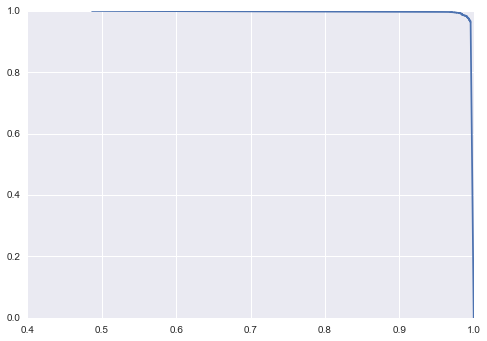


 Decision Tree 



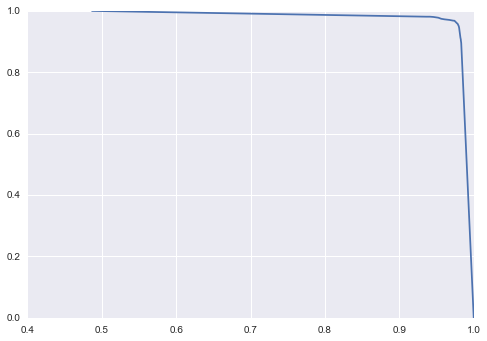


 Random Forest 



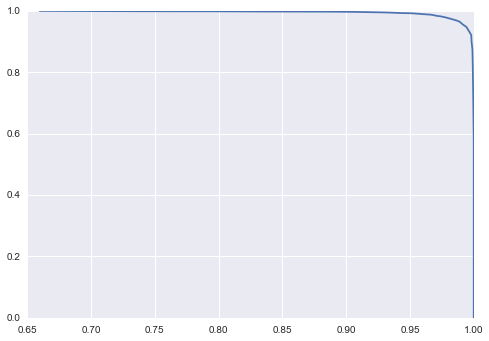


 Support Vector Machine 



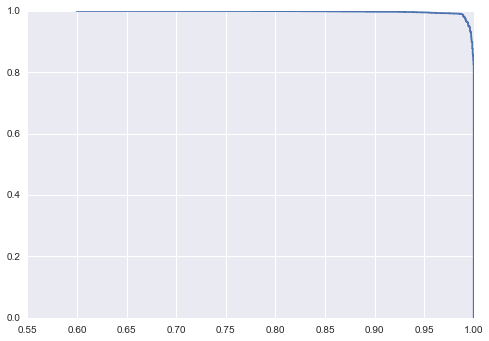

In [51]:
#(Harder) task t9h
#Print the precision recall curve for each of the models above
#  Write code here
t9h=label_binarize(binary_class_testing_labels,classes=[7,9])

precision1,recall1,threshold1=metrics.precision_recall_curve(t9h,predictions_best_knn_model_bc)
precision2,recall2,threshold2=metrics.precision_recall_curve(t9h,predictions_best_dtree_model_bc)
precision3,recall3,threshold3=metrics.precision_recall_curve(t9h,predictions_best_rf_model_bc)
precision4,recall4,threshold4=metrics.precision_recall_curve(t9h,predictions_best_svm_model_bc)

print '\n Precision Recall Curve \n k Nearest Neighbors \n'
plt.plot(precision1,recall1)
plt.show()

print '\n Decision Tree \n'
plt.plot(precision2,recall2)
plt.show()

print '\n Random Forest \n'
plt.plot(precision3,recall3)
plt.show()

print '\n Support Vector Machine \n'
plt.plot(precision4,recall4)
plt.show()


#Part 4: Parameter Tuning through Grid Search/Cross Validation and Parallelization

So far in this assignment, you manually tweaked the model till it became better.
For complex models, this is often cumbersome.
A common trick people use is called Grid Search where you exhaustively test various parameter combinations
and pick the best set of parameter values.
This is a VERY computationally intensive process and hence it will require some parallelization.

In this assignment, you will learn how to tune two models (a RandmForest and SVC SVM) for MNIST dataset
and then parallelize it so as to get results faster.
You might want to take a look at the url
http://scikit-learn.org/stable/modules/grid_search.html
for additional details.

One thing you might want to note is that the GridSearchCV uses cross validation for comparing models.
So you have to send the ENTIRE MNIST dataset - i.e. mnist.data and mnist.target . 
The following cell creates two variables all_scaled_data and all_scaled_target that you can pass to GridSearchCV.
In order to get the results in reasonable time, set the **cv** parameter of GridSearchCV to 3.
Also remember to set the **verbose** parameter to 2 to get some details about what happens internally.

In [4]:
###Do not make any change below
all_scaled_data = binary_class_data / 255.0
all_scaled_target = binary_class_labels

In [5]:
#(Harder) task t10a
#Tuning SVC SVM model for MNIST
tuned_parameters = [{'kernel' : ['rbf'], 'gamma': [0.1, 1e-2, 1e-3], 'C': [10, 100, 1000]},
                    {'kernel' : ['poly'], 'degree' : [5, 9], 'C' : [1, 10]}] 
#replace this line with gridsearchcv
#Create a SVC SVM classifier object and tune it using GridSearchCV  function.
#Change the following line as appropriate
svm=GridSearchCV(estimator=svc_svm_model_student, param_grid=tuned_parameters, cv=3, verbose=2)
svm.fit(all_scaled_data,all_scaled_target)
#print the details of the best model and its accuracy
print 'Best Estimator \n', svm.best_estimator_
print '\n Accuracy Score', svm.best_score_

Fitting 3 folds for each of 13 candidates, totalling 39 fits
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV] ............................ kernel=rbf, C=10, gamma=0.1 -11.6min
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV] ............................ kernel=rbf, C=10, gamma=0.1 -11.4min
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV] ............................ kernel=rbf, C=10, gamma=0.1 -12.0min
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] ........................... kernel=rbf, C=10, gamma=0.01 - 1.2min
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] ........................... kernel=rbf, C=10, gamma=0.01 - 1.0min
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] ........................... kernel=rbf, C=10, gamma=0.01 -  56.6s
[CV] kernel=rbf, C=10, gamma=0.001 ...................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed: 11.6min
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed: 120.0min finished



Best Estimator 
SVC(C=100, cache_size=100, class_weight=None, coef0=0.0, degree=4, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=True, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

 Accuracy Score 0.993053119079


In [25]:
### (Harder) task t10b
#Tuning Random Forest for MNIST
tuned_parameters = [{'max_features': ['sqrt', 'log2'], 'n_estimators': [1000, 1500]}] 
#replace this line with gridsearchcv. Remember to pass 
# the following parameters to constructor or RandomForestClassifier min_samples_split=1, compute_importances=False, n_jobs=-1
#Change the following line as appropriate
rf_model_default_student = RandomForestClassifier(min_samples_split=1, n_jobs=-1, random_state=1234,compute_importances=False)                                                                                                                                      
rf = GridSearchCV(estimator=rf_model_default_student, param_grid=tuned_parameters, cv=3, verbose=2) 
rf.fit(all_scaled_data,all_scaled_target)
#print the details of the best model and its accuracy
print '\n Best Estimator \n', rf.best_estimator_
print '\n Accuracy Score', rf.best_score_   

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] max_features=sqrt, n_estimators=1000 ............................
[CV] ................... max_features=sqrt, n_estimators=1000 -  27.4s

//anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:776: DeprecationWarning: Setting compute_importances is no longer required as version 0.14. Variable importances are now computed on the fly when accessing the feature_importances_ attribute. This parameter will be removed in 0.16.
  DeprecationWarning)
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   27.4s



[CV] max_features=sqrt, n_estimators=1000 ............................
[CV] ................... max_features=sqrt, n_estimators=1000 -  29.5s
[CV] max_features=sqrt, n_estimators=1000 ............................
[CV] ................... max_features=sqrt, n_estimators=1000 -  25.6s
[CV] max_features=sqrt, n_estimators=1500 ............................
[CV] ................... max_features=sqrt, n_estimators=1500 -  46.5s
[CV] max_features=sqrt, n_estimators=1500 ............................
[CV] ................... max_features=sqrt, n_estimators=1500 -  53.1s
[CV] max_features=sqrt, n_estimators=1500 ............................
[CV] ................... max_features=sqrt, n_estimators=1500 -  49.4s
[CV] max_features=log2, n_estimators=1000 ............................
[CV] ................... max_features=log2, n_estimators=1000 -  11.2s
[CV] max_features=log2, n_estimators=1000 ............................
[CV] ................... max_features=log2, n_estimators=1000 -  11.1s
[CV] 

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  5.2min finished


In [26]:
#(Harder) task t10c
#Parallelization
#Now re-run the tuning of SVC SVM model. But parallelize it via n_jobs option.
tuned_parameters = [{'kernel' : ['rbf'], 'gamma': [0.1, 1e-2, 1e-3], 'C': [10, 100, 1000]},
                    {'kernel' : ['poly'], 'degree' : [5, 9], 'C' : [1, 10]}]
#Change the following line as appropriate
svm_parallel=GridSearchCV(estimator=svc_svm_model_student, param_grid=tuned_parameters,n_jobs=5, cv=3, verbose=2)
svm_parallel.fit(all_scaled_data,all_scaled_target)
#print the details of the best model and its accuracy
print 'Best Estimator \n', svm.best_estimator_
print '\n Accuracy Score', svm.best_score_

Fitting 3 folds for each of 13 candidates, totalling 39 fits


[Parallel(n_jobs=5)]: Done   1 jobs       | elapsed: 18.4min
[Parallel(n_jobs=5)]: Done  39 out of  39 | elapsed: 44.6min finished


Best Estimator 
SVC(C=100, cache_size=100, class_weight=None, coef0=0.0, degree=4, gamma=0.01,
  kernel='rbf', max_iter=-1, probability=True, random_state=1234,
  shrinking=True, tol=0.001, verbose=False)

 Accuracy Score 0.993053119079
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV] kernel=rbf, C=10, gamma=0.1 .....................................
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] kernel=rbf, C=10, gamma=0.01 ....................................
[CV] ............................ kernel=rbf, C=10, gamma=0.1 -18.4min[CV] ............................ kernel=rbf, C=10, gamma=0.1 -18.3min[CV] ............................ kernel=rbf, C=10, gamma=0.1 -17.9min[CV] ........................... kernel=rbf, C=10, gamma=0.01 - 1.9min[CV] ........................... kernel=rbf, C=10, gamma=0.01 - 1.9min




[CV] kernel=rbf, C=100, gamma=0.01 ..................

#Part 5: Evaluation of Various Regression Models for Boston Houses Dataset

We will now implement some regression routines for predicting the house prices in Boston.

In [6]:
#Do not make any changes in this cell
boston = load_boston()  
print boston.data.shape 
print boston.feature_names 
print np.max(boston.target), np.min(boston.target), np.mean(boston.target)  
print boston.DESCR     


(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
50.0 5.0 22.5328063241
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hi

In [7]:
#Do not make any changes in this cell.
print boston.data[0]   
print np.max(boston.data), np.min(boston.data), np.mean(boston.data) 

X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=1234)

#Scale the data - important for regression. Learn what this function does
scalerX = StandardScaler().fit(X_train)
scalery = StandardScaler().fit(y_train)

X_train = scalerX.transform(X_train)  
y_train = scalery.transform(y_train)  
X_test = scalerX.transform(X_test)    
y_test = scalery.transform(y_test)

print np.max(X_train), np.min(X_train), np.mean(X_train), np.max(y_train), np.min(y_train), np.mean(y_train) 

[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
711.0 0.0 70.0724468258
10.3350722657 -3.98458419342 1.75652740442e-15 3.12177191399 -1.81569984046 3.02308749713e-16


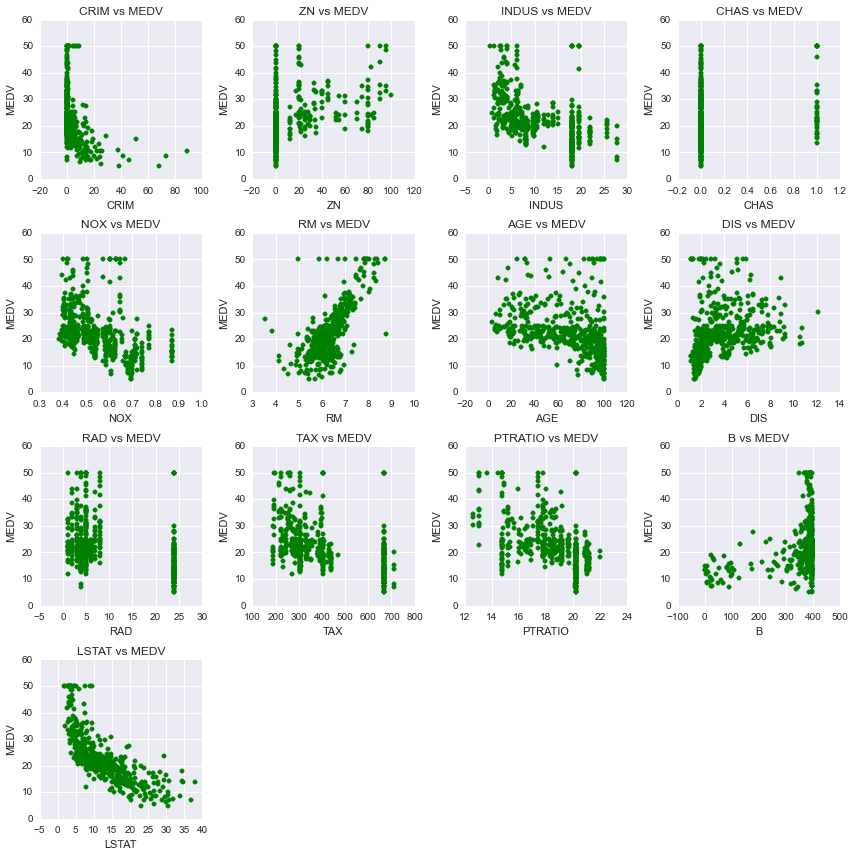

In [24]:
#task t11a
#Create 13 scatter plots such that variables (CRIM to LSTAT) are in X axis and MEDV in y-axis.
# Organize the images such that the images are in 3 rows of 4 images each and 1 in last row

#Write code here

boston_df = pd.DataFrame(boston.data)
boston_df.columns = boston.feature_names
boston_df['MEDV'] = boston.target

fig = plt.figure(figsize=(12,12))

ax1 = fig.add_subplot(4,4,1)
ax1.set_xlabel("CRIM")
ax1.set_ylabel("MEDV")
ax1.set_title("CRIM vs MEDV")
plt.tight_layout()
ax1.scatter(boston_df.CRIM, boston_df.MEDV, marker = 'o', color = 'g')


ax2 = fig.add_subplot(4,4,2)
ax2.set_xlabel("ZN")
ax2.set_ylabel("MEDV")
ax2.set_title("ZN vs MEDV")
ax2.scatter(boston_df.ZN, boston_df.MEDV, marker='o', color = 'g')


ax3 = fig.add_subplot(4,4,3)
ax3.set_xlabel("INDUS")
ax3.set_ylabel("MEDV")
ax3.set_title("INDUS vs MEDV")
ax3.scatter(boston_df.INDUS, boston_df.MEDV, marker='o', color = 'g')


ax4 = fig.add_subplot(4,4,4)
ax4.set_xlabel("CHAS")
ax4.set_ylabel("MEDV")
ax4.set_title("CHAS vs MEDV")
ax4.scatter(boston_df.CHAS, boston_df.MEDV, marker='o', color = 'g')


ax5 = fig.add_subplot(4,4,5)
ax5.set_xlabel("NOX")
ax5.set_ylabel("MEDV")
ax5.set_title("NOX vs MEDV")
plt.tight_layout()
ax5.scatter(boston_df.NOX, boston_df.MEDV, marker='o', color = 'g')


ax6 = fig.add_subplot(4,4,6)
ax6.set_xlabel("RM")
ax6.set_ylabel("MEDV")
ax6.set_title("RM vs MEDV")
ax6.scatter(boston_df.RM, boston_df.MEDV, marker='o', color = 'g')


ax7 = fig.add_subplot(4,4,7)
ax7.set_xlabel("AGE")
ax7.set_ylabel("MEDV")
ax7.set_title("AGE vs MEDV")
ax7.scatter(boston_df.AGE, boston_df.MEDV, marker='o', color = 'g')


ax8 = fig.add_subplot(4,4,8)
ax8.set_xlabel("DIS")
ax8.set_ylabel("MEDV")
ax8.set_title("DIS vs MEDV")
ax8.scatter(boston_df.DIS, boston_df.MEDV, marker='o', color = 'g')


ax9 = fig.add_subplot(4,4,9)
ax9.set_xlabel("RAD")
ax9.set_ylabel("MEDV")
ax9.set_title("RAD vs MEDV")
plt.tight_layout()
ax9.scatter(boston_df.RAD, boston_df.MEDV, marker='o', color = 'g')


ax10 = fig.add_subplot(4,4,10)
ax10.set_xlabel("TAX")
ax10.set_ylabel("MEDV")
ax10.set_title("TAX vs MEDV")
ax10.scatter(boston_df.TAX, boston_df.MEDV, marker='o', color = 'g')


ax11 = fig.add_subplot(4,4,11)
ax11.set_xlabel("PTRATIO")
ax11.set_ylabel("MEDV")
ax11.set_title("PTRATIO vs MEDV")
ax11.scatter(boston_df.PTRATIO, boston_df.MEDV, marker='o', color = 'g')


ax12 = fig.add_subplot(4,4,12)
ax12.set_xlabel("B")
ax12.set_ylabel("MEDV")
ax12.set_title("B vs MEDV")
ax12.scatter(boston_df.B, boston_df.MEDV, marker='o', color = 'g')


ax13 = fig.add_subplot(4,4,13)
ax13.set_xlabel("LSTAT")
ax13.set_ylabel("MEDV")
ax13.set_title("LSTAT vs MEDV")
plt.tight_layout()
ax13.scatter(boston_df.LSTAT, boston_df.MEDV, marker='o', color = 'g')

In [27]:
#Do not make any change here
#To make your life easy, I have created a function that 
# (a) takes a regressor object,(b) trains it (c) makes some prediction (d) evaluates the prediction
def train_and_evaluate(clf, X_train, y_train): 
    clf.fit(X_train, y_train)   
    print "Coefficient of determination on training set:",clf.score(X_train, y_train)  
    cv = KFold(X_train.shape[0], 5, shuffle=True, random_state=1234)   
    scores = cross_val_score(clf, X_train, y_train, cv=cv)   
    print "Average coefficient of determination using 5-fold crossvalidation:",np.mean(scores)  
    
def plot_regression_fit(actual, predicted):
    plt.scatter(actual, predicted)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)') 

Coefficient of determination on training set: 0.730208069559
Average coefficient of determination using 5-fold crossvalidation: 0.697329670705


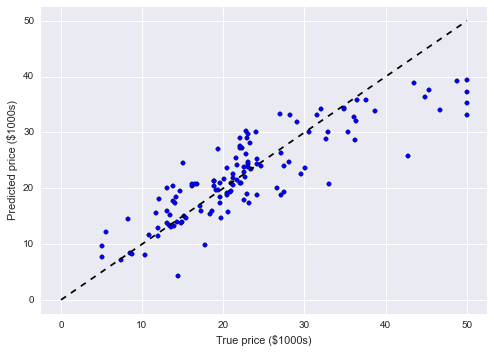

In [28]:
#task t11b
#create a regressor object based on LinearRegression
# See http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#Change the following line as appropriate
clf_ols = LinearRegression() #change this line
train_and_evaluate(clf_ols,X_train,y_train) 
clf_ols_predicted = clf_ols.predict(X_test)   
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_ols_predicted))

Coefficient of determination on training set: 0.698960724444
Average coefficient of determination using 5-fold crossvalidation: 0.677821597121
Coefficient of determination on training set: 0.879810899174
Average coefficient of determination using 5-fold crossvalidation: 0.67285376301
Coefficient of determination on training set: 0.869497333473
Average coefficient of determination using 5-fold crossvalidation: 0.792544663494


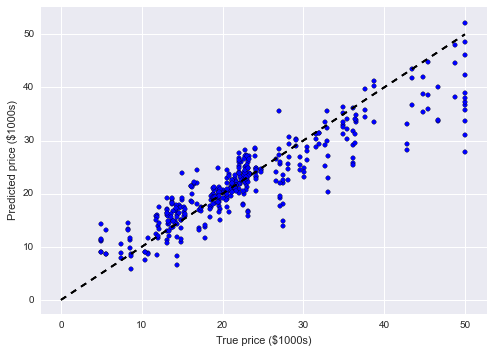

In [31]:
#task t11c
#See http://scikit-learn.org/stable/auto_examples/svm/plot_svm_regression.html
#Create a regression based on Support Vector Regressor. Set the kernel to linear
#Change the following line as appropriate
clf_svr= SVR(kernel='linear')  
train_and_evaluate(clf_svr,X_train,y_train) 
clf_svr_predicted = clf_svr.predict(X_test) 
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_svr_predicted))   

#task t11d
#Create a regression based on Support Vector Regressor. Set the kernel to polynomial
#Change the following line as appropriate
clf_svr_poly= SVR(kernel='poly')     
train_and_evaluate(clf_svr_poly,X_train,y_train) 
clf_svr_poly_predicted = clf_svr_poly.predict(X_test)      
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_svr_poly_predicted)) 

#task t11e
#Create a regression based on Support Vector Regressor. Set the kernel to rbf
#Change the following line as appropriate
clf_svr_rbf= clf_svr_rbf= SVR(kernel='rbf') 
train_and_evaluate(clf_svr_rbf,X_train,y_train)
clf_svr_rbf_predicted = clf_svr_rbf.predict(X_test)    
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_svr_rbf_predicted))

Coefficient of determination on training set: 0.684692425264
Average coefficient of determination using 5-fold crossvalidation: 0.583385863337


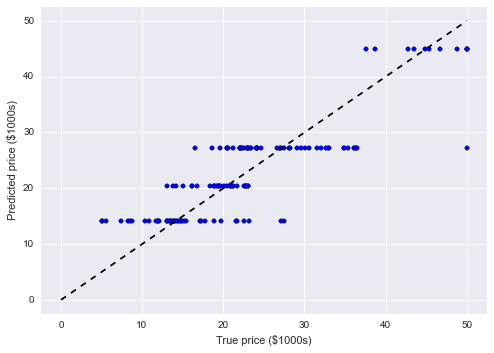

In [32]:
#task t11f
#See http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
#Create regression tree
#Change the following line as appropriate
clf_cart = DecisionTreeRegressor(max_depth=2)   
train_and_evaluate(clf_cart,X_train,y_train) 
clf_cart_predicted = clf_cart.predict(X_test)  
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_cart_predicted))  


Coefficient of determination on training set: 0.973800976896
Average coefficient of determination using 5-fold crossvalidation: 0.8348507043
[['0.00102271671416' 'AGE']
 ['0.00170914978892' 'B']
 ['0.00224924400046' 'CHAS']
 ['0.00673636957636' 'CRIM']
 ['0.0108814568913' 'DIS']
 ['0.0123642647619' 'INDUS']
 ['0.0189779732305' 'LSTAT']
 ['0.0202834249095' 'NOX']
 ['0.0344749225758' 'PTRATIO']
 ['0.0378219977807' 'RAD']
 ['0.0560709681504' 'RM']
 ['0.364506357036' 'TAX']
 ['0.432901154584' 'ZN']]


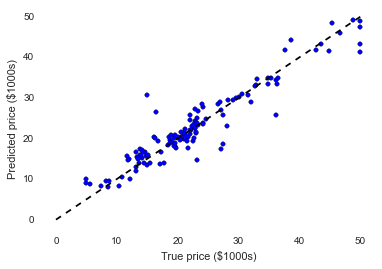

In [41]:
#task t11g
#See http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
#Create a random forest regressor with 10 estimators and random state as 1234
#Change the following line as appropriate
clf_rf= RandomForestRegressor(n_estimators=10, random_state=1234)
train_and_evaluate(clf_rf,X_train,y_train)  
#The following line prints the most important features
print np.sort(zip(clf_rf.feature_importances_,boston.feature_names),axis=0)  
clf_rf_predicted = clf_rf.predict(X_test)      
plot_regression_fit(scalery.inverse_transform(y_test), scalery.inverse_transform(clf_rf_predicted)) 